In [1]:

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest

import scipy.stats as stats
import time
sns.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

I am using a data set about wine quality (for a Portugese brand). The data set contains information for red and white wines. 
Type (red or white) will be my classifier

Fixed acidity: Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

Citric Acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines.

Residual Sugar : The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

Chlorides : The amount of salt in the wine.

Free Sulfur Dioxide : The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

Total Sulfur Dioxide : Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

Density : The density of wine is close to that of water depending on the percent alcohol and sugar content.

pH : Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

Sulphates : Wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

Alcohol : The percent alcohol content of the wine.


In [2]:
wine = pd.read_csv('winequality.csv')

In [3]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,w,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,w,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,w,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,w,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,w,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


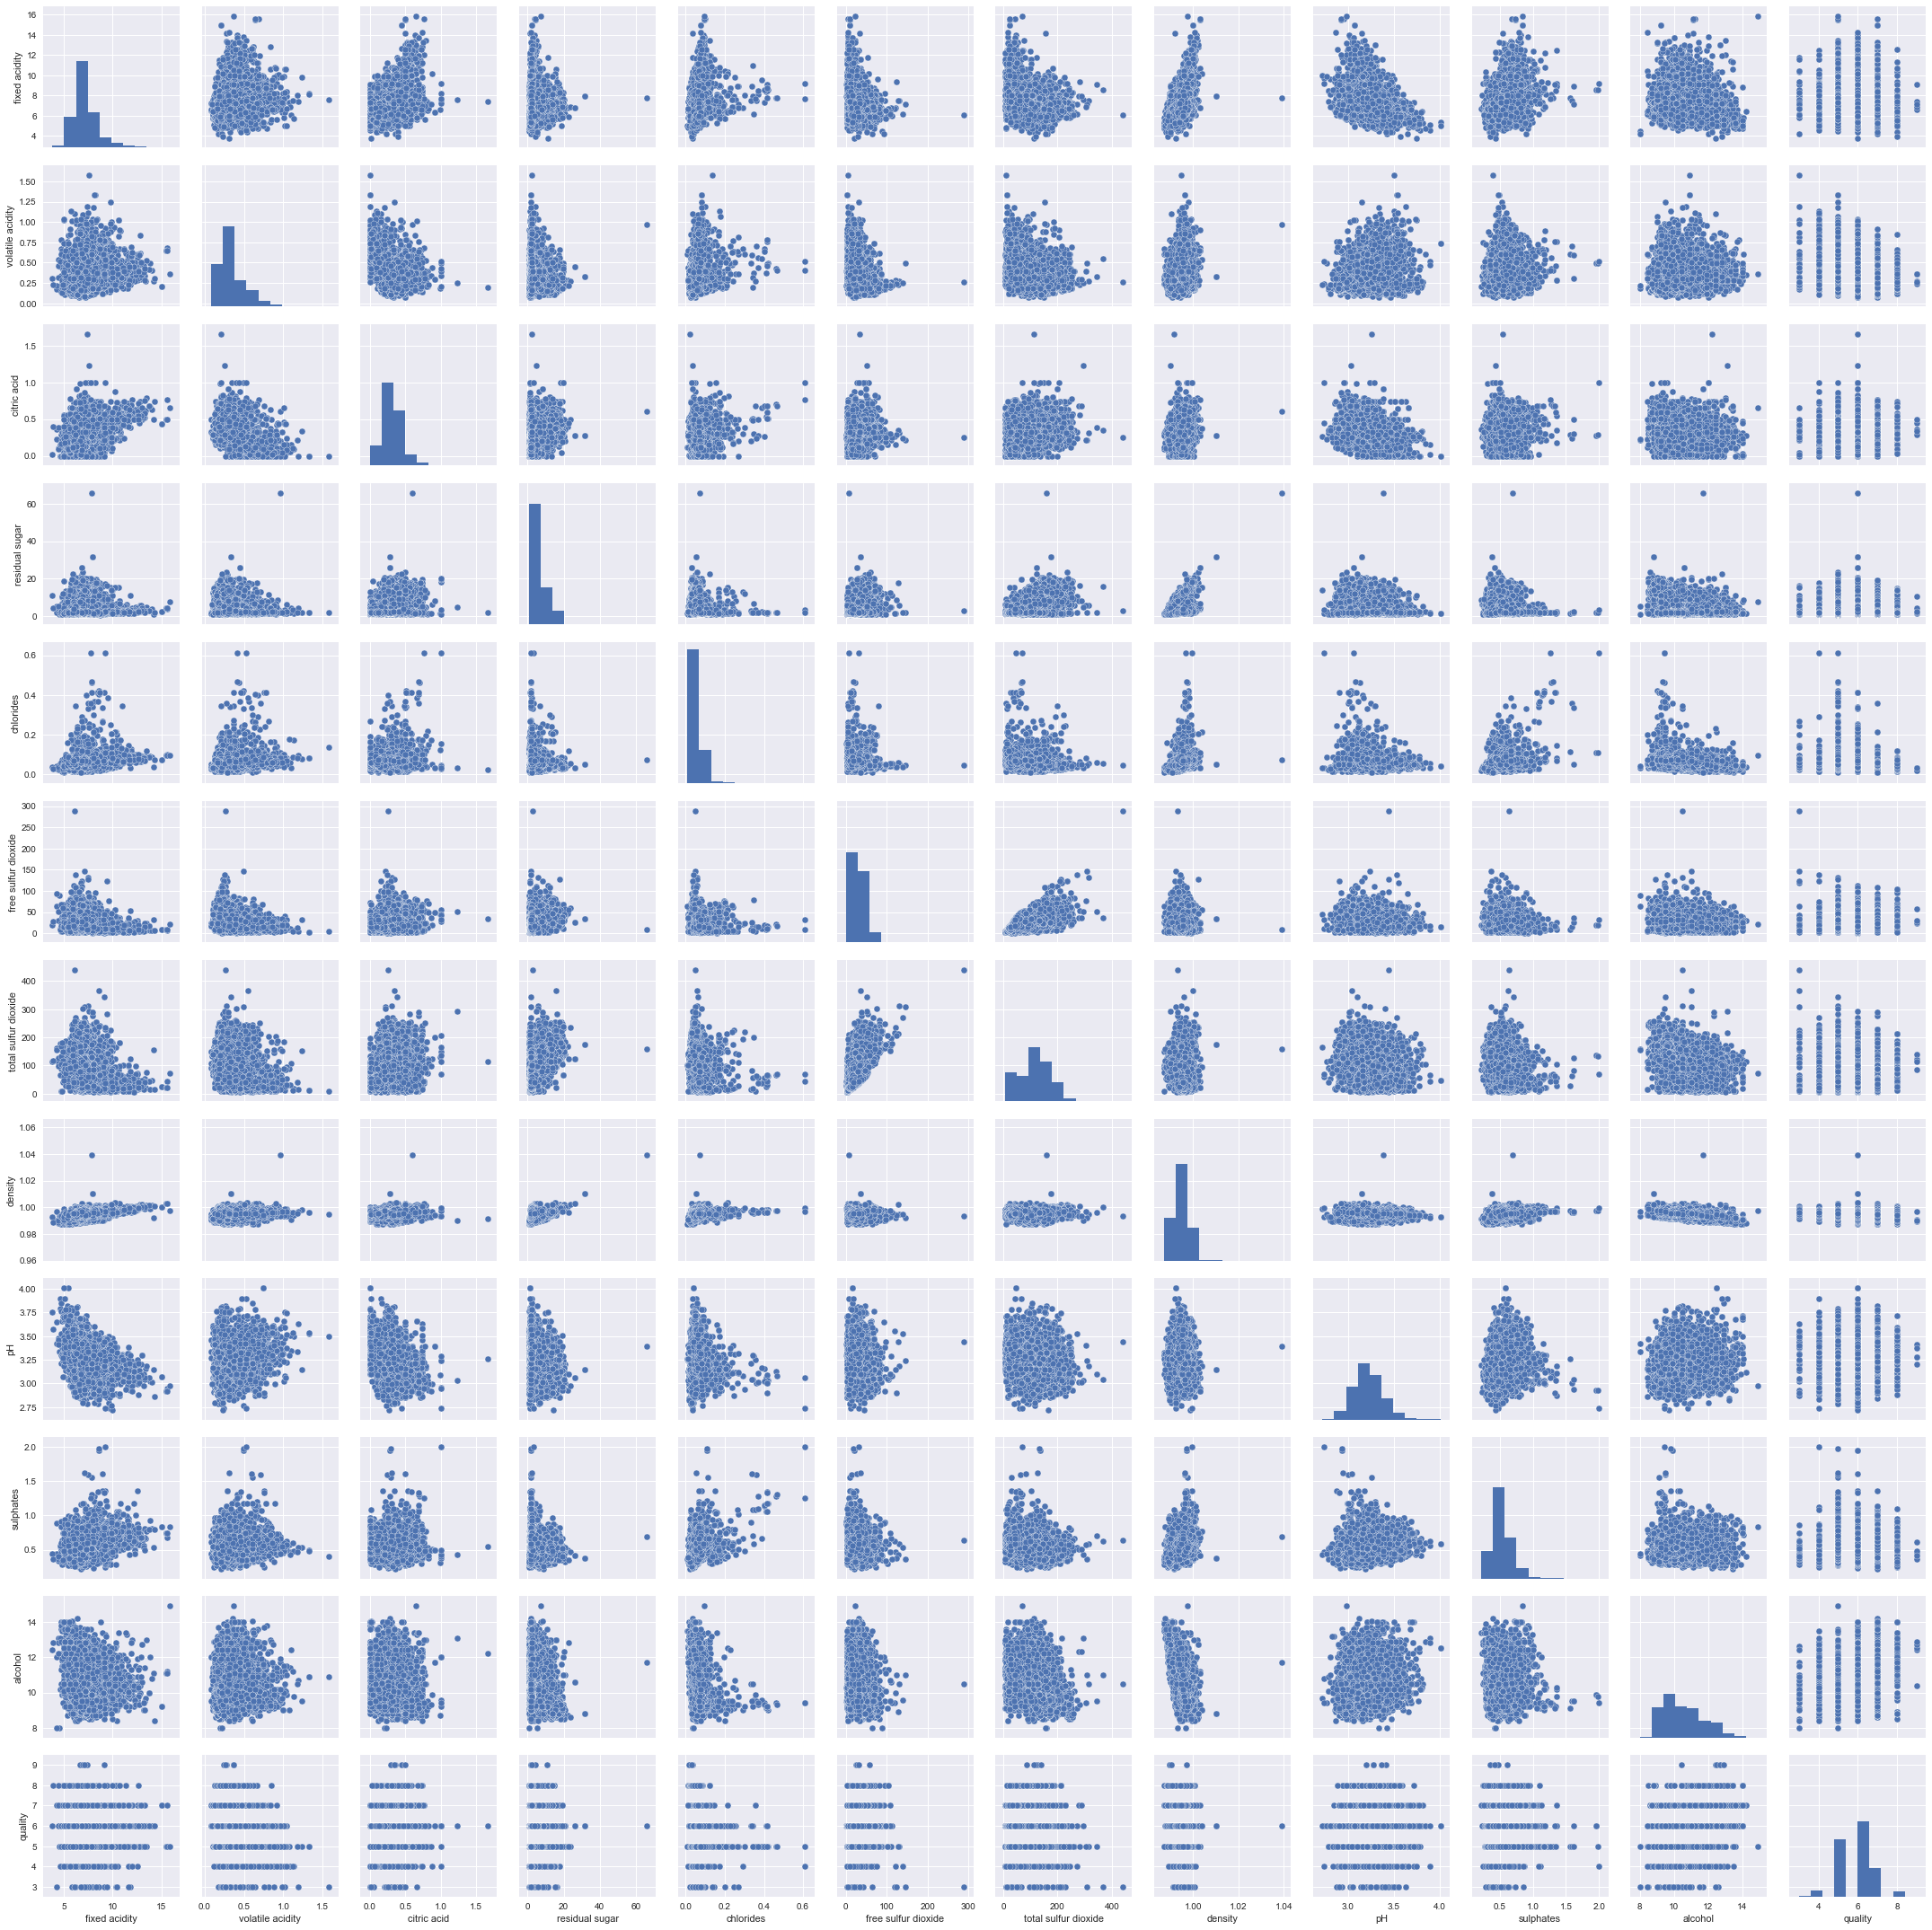

In [16]:
sns.pairplot(wine[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality'
       ]])

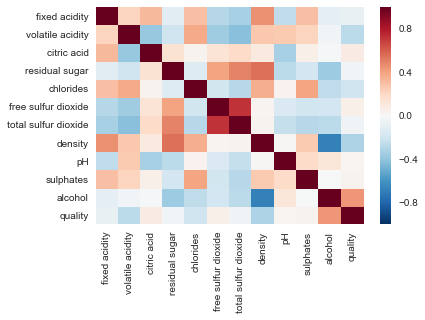

In [6]:
sns.heatmap(wine.corr())

In [7]:
from IPython.display import display
correlation_matrix = wine.corr()
display(correlation_matrix)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


There doesnt seem to be too much shared correlation. I am going to just use these vars as is

In [9]:
wine = pd.read_csv('winequality.csv')


In [10]:
features = wine.copy()
features=features.drop(['type'],axis =1)

In [11]:
#now scale!

# Select only numeric variables to scale.
df_num= features.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the correct column names.
feat_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names, index=wine.index)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

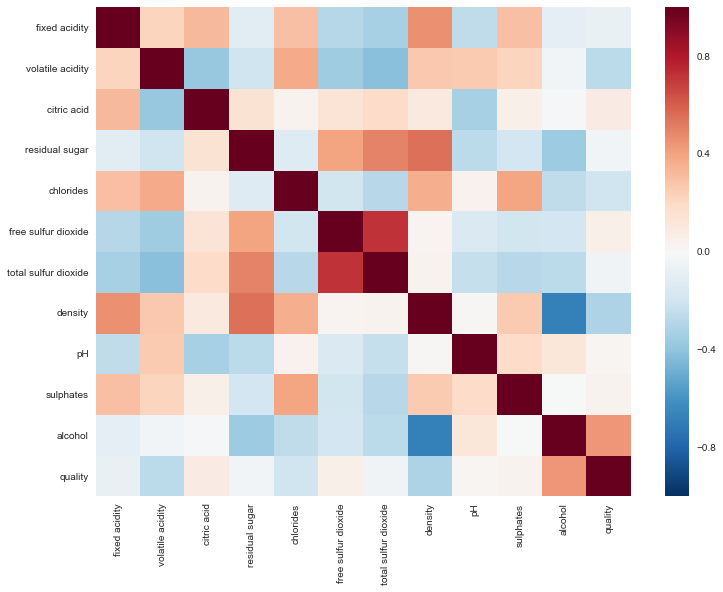

In [12]:
#select best features
corrmat = feat_scaled.corr()
print(corrmat)

f,ax = plt.subplots(figsize =(12,9))


sns.heatmap(corrmat)
plt.show()

In [13]:
#select best features
feat_scaled['type'] = wine['type']
feat_scaled.head()

# corrmat = feat_scaled.corr()
# print(corrmat.type.abs().sort_values(ascending=False).iloc[1:8])
# corrmat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,0.207999,w
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,0.207999,w
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,0.207999,w
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,0.207999,w
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,0.207999,w


## Decision Tree


In [14]:
from sklearn.model_selection import cross_val_score


X = feat_scaled.drop('type',1)
Y = feat_scaled['type']

#creating start time var
import time
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6
)

decision_tree.fit(X,Y)
dt_score = cross_val_score(decision_tree, X, Y, cv=5)
print(dt_score)
print('\nAccuracy: %.2f +/- %.2f\n' % (dt_score.mean(), 2*dt_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.96230769  0.94923077  0.9         0.92917629  0.93374422]

Accuracy: 0.93 +/- 0.04

--- 0.1119999885559082 seconds ---


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X = feat_scaled.drop('type',1)
Y = feat_scaled['type']

X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 


#creating start time var
import time
start_time = time.time()



decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6 
)

decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

print("\nAccuracy on training set: {:.3f}".format(decision_tree.score(X_train, Y_train)))
print("\nAccuracy on test set: {:.3f}".format(decision_tree.score(X_test, Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))


Accuracy on training set: 0.933

Accuracy on test set: 0.925
--- 0.01699995994567871 seconds ---


This is pretty good! But I likely dont need all of these features. I want to try a PCA to see if there are differences

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.25346226  0.22082117  0.13679223  0.0890521   0.07004171  0.05503326
  0.04698554  0.04299857  0.03819769  0.02491774  0.01896563  0.0027321 ]
The Eigenvalues are.
 [ 3.04154713  2.649854    1.64150682  1.06862526  0.84050047  0.66039918
  0.56382645  0.51598284  0.45837228  0.2990129   0.22758752  0.03278516]


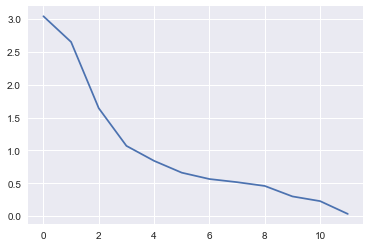

In [16]:
#lets do a pca

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from matplotlib.mlab import PCA as mlabPCA


sklearn_pca = PCA()
X = features
feat_norm = StandardScaler().fit_transform(X)
Y_sklearn = sklearn_pca.fit_transform(feat_norm)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

print(
    'The Eigenvalues are.\n',
    sklearn_pca.explained_variance_)

plt.plot(sklearn_pca.explained_variance_)


In [18]:
best_comp =pd.DataFrame(Y_sklearn[:,0:4])

In [19]:
from sklearn.model_selection import cross_val_score


X = best_comp
Y = wine['type']

#creating start time var
import time
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6
)

decision_tree.fit(X,Y)
dt_score = cross_val_score(decision_tree, X, Y, cv=5)
print(dt_score)
print('\nAccuracy: %.2f +/- %.2f\n' % (dt_score.mean(), 2*dt_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.98153846  0.83538462  0.98769231  0.93533487  0.97765794]

Accuracy: 0.94 +/- 0.11

--- 0.12600016593933105 seconds ---


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X = best_comp
Y = wine['type']

X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 


#creating start time var
import time
start_time = time.time()



decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6 
)

decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

print("\nAccuracy on training set: {:.3f}".format(decision_tree.score(X_train, Y_train)))
print("\nAccuracy on test set: {:.3f}".format(decision_tree.score(X_test, Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))


Accuracy on training set: 0.990

Accuracy on test set: 0.983
--- 0.02700018882751465 seconds ---


Using the PCA comps works even better! Albeat a slightly longer processing time.  Now lets try random forrest





## Random Forrest

In [21]:
#first using all features
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

X = feat_scaled.drop('type',1)
Y = feat_scaled['type']

# X = pd.get_dummies(X)
X = X.dropna(axis=1)

start_time = time.time()

rfc.fit(X,Y)
rfc_score = cross_val_score(rfc, X, Y, cv=5)
print(rfc_score)
print('\nAccuracy: %.2f +/- %.2f\n' % (rfc_score.mean(), 2*rfc_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))


[ 0.99076923  0.99076923  0.99076923  0.98614319  0.99614792]

Accuracy: 0.99 +/- 0.01

--- 0.7530002593994141 seconds ---


In [23]:
#first using all features
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

X = feat_scaled.drop('type',1)
Y = feat_scaled['type']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

start_time = time.time()

rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

print("\nAccuracy on training set: {:.3f}".format(rfc.score(X_train, Y_train)))
print("\nAccuracy on test set: {:.3f}".format(rfc.score(X_test, Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))




Accuracy on training set: 0.998

Accuracy on test set: 0.985
--- 0.12200021743774414 seconds ---


In [24]:
#now lets do use our pca comps

In [25]:
#first using all features
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

X = best_comp
Y = wine['type']

# X = pd.get_dummies(X)
X = X.dropna(axis=1)

start_time = time.time()

rfc.fit(X,Y)
rfc_score = cross_val_score(rfc, X, Y, cv=5)
print(rfc_score)
print('\nAccuracy: %.2f +/- %.2f\n' % (rfc_score.mean(), 2*rfc_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))


[ 0.98384615  0.97692308  0.99076923  0.97844496  0.97996918]

Accuracy: 0.98 +/- 0.01

--- 0.5350000858306885 seconds ---


In [26]:
#first using all features
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

X = best_comp
Y = wine['type']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

start_time = time.time()

rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

print("\nAccuracy on training set: {:.3f}".format(rfc.score(X_train, Y_train)))
print("\nAccuracy on test set: {:.3f}".format(rfc.score(X_test, Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))




Accuracy on training set: 0.999

Accuracy on test set: 0.986
--- 0.12200021743774414 seconds ---


In [ ]:
#about the same as using all faetures, but slightly beter. 